In [2]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv(r'data/pandas_df2.csv', dtype='str')

In [137]:
df2 = df.head(1000).copy()
df2.head()

,Unnamed: 0,Name,Product_ID,Product_UserTypeID,AT_MaraBshmCax3D,AT_MaraNtgew,AT_MaraVolum,AT_SAPID,AT_MaraMatkl,AT_MaraNumtp,...,AT_MaraLabor,AT_MaraExtwg,AT_MaraBismt,AT_MaraMeins,AT_MaraMtart,AT_MaraGroes,AT_LeadingSystem,AT_MaraNtgew_UnitID,AT_MaraVolum_UnitID,AT_MaraBrgew_UnitID
0,1,9001422279 - Lens Head Screw M4x8,MAT_928319,Material,60100004395930,1.300,0.000,9001422279,H002 - Customized screws,NaN,...,"H10 - FCGB Inserra, Bortolo",NaN,5750172759,piece(s),Materials which are externally procured,NaN,SAP,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM
1,2,9001730689 - CP body laser printed WT45HV14FR,MAT_928320,Material,NaN,0.318,0.000,9001730689,R239 - xxx - do not use anymore,prefabricated parts,...,WD0 - FLCD Default (FDW),NaN,9001452855,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM
2,3,"9001730699 - USER MA. SE (WT45HV14FR), FR",MAT_928323,Material,NaN,0.020,0.000,9001730699,X810 - Printed material (general),NaN,...,WD0 - FLCD Default (FDW),NaN,9001452871,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.KGM,unece.unit.CMQ,unece.unit.KGM
3,4,9001731054 - fascia panel GV650A.UC Int White...,MAT_928324,Material,60100007114130,0.000,0.000,9001731054,R250 - Injected parts (general),NaN,...,"G8A - FDG Neukirchner,Daniel",NaN,8001186041,piece(s),Materials which can be potentially produced in...,NaN,SAP,unece.unit.GRM,unece.unit.CMQ,unece.unit.GRM
4,5,9001762412 - Cable Harness operat. EE 590 SP....,MAT_928325,Material,60100008886908,26.800,0.000,9001762412,L592 - IDC+IDC jumpers,NaN,...,"VBI - FCGB Schuhmacher, Jochen",NaN,NaN,piece(s),Materials which are externally procured,L 590MM,SAP,unece.unit.GRM,unece.unit.DMQ,unece.unit.GRM


Start code from here

In [151]:
#keep only the columns we deem necessary
df3 = df2[['Name', 'AT_MaraMatkl', 'AT_MaraMaktx', 'AT_MaraBrgew', 'AT_MaraMtart', 'AT_MaraLabor']]
df3.head()

,Name,AT_MaraMatkl,AT_MaraMaktx,AT_MaraBrgew,AT_MaraMtart,AT_MaraLabor
0,9001422279 - Lens Head Screw M4x8,H002 - Customized screws,Lens Head Screw M4x8,1.300,Materials which are externally procured,"H10 - FCGB Inserra, Bortolo"
1,9001730689 - CP body laser printed WT45HV14FR,R239 - xxx - do not use anymore,CP body laser printed WT45HV14FR,0.318,Materials which can be potentially produced in...,WD0 - FLCD Default (FDW)
2,"9001730699 - USER MA. SE (WT45HV14FR), FR",X810 - Printed material (general),"USER MA. SE (WT45HV14FR), FR",0.020,Materials which can be potentially produced in...,WD0 - FLCD Default (FDW)
3,9001731054 - fascia panel GV650A.UC Int White...,R250 - Injected parts (general),fascia panel GV650A.UC Int White 300,0.000,Materials which can be potentially produced in...,"G8A - FDG Neukirchner,Daniel"
4,9001762412 - Cable Harness operat. EE 590 SP....,L592 - IDC+IDC jumpers,Cable Harness operat. EE 590 SP........,26.800,Materials which are externally procured,"VBI - FCGB Schuhmacher, Jochen"


In [139]:
# text preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords') 
nltk.download('wordnet')

# Rule: all functions must be idempotent (i.e. f(f(x)) = f(x))

# remove all non-alphanumeric characters (id) in Name
df3['Name'].replace(r'[^a-zA-Z]', ' ', regex=True, inplace=True)

# convert all text to lowercase
df3 = df3.apply(lambda x: x.astype(str).str.lower())

# remove punctuation from columns
for col in df3.columns:
    df3[col] = df3[col].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

# remove all stopwords
stop_words = stopwords.words('english')
for col in df3.columns:
    df3[col] = df3[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# stemming
ps = PorterStemmer()
for col in df3.columns:
    df3[col] = df3[col].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

# lemmatization
lemmatizer = WordNetLemmatizer()
for col in df3.columns:
    df3[col] = df3[col].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df3.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/floriankark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/floriankark/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/qs/md0by3p95fs1y9pznxzwc2s80000gp/T/ipykernel_34671/2307137030.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Name'].replace(r'[^a-zA-Z]', ' ', regex=True, inplace=True)


,Name,AT_MaraMatkl,AT_MaraMaktx,AT_MaraBrgew,AT_MaraMtart,AT_MaraLabor
0,len head screw x,h002 custom screw,len head screw m4x8,1300,materi extern procur,h10 fcgb inserra bortolo
1,cp bodi laser print wt hv fr,r239 xxx use anymor,cp bodi laser print wt45hv14fr,0318,materi potenti produc intern,wd0 flcd default fdw
2,user se wt hv fr fr,x810 print materi gener,user se wt45hv14fr fr,0020,materi potenti produc intern,wd0 flcd default fdw
3,fascia panel gv uc int white,r250 inject part gener,fascia panel gv650auc int white 300,0000,materi potenti produc intern,g8a fdg neukirchnerdaniel
4,cabl har operat ee sp,l592 idcidc jumper,cabl har operat ee 590 sp,26800,materi extern procur,vbi fcgb schuhmach jochen


In [147]:
# prepare dataframes

# join all columns into one
df_new = df3.astype(str).agg(' '.join, axis=1)
df_old = df2.astype(str).agg(' '.join, axis=1)

#print first 10 rows of df_new
df_new.head(10)
#df2 = df2.iloc[:,-1:]
#df3 = df2.text.apply(heavy_text_clean)
display(df_new.head(10).astype(str), df_old.head(10).astype(str))

0    len head screw x h002 custom screw len head sc...
1    cp bodi laser print wt hv fr r239 xxx use anym...
2    user se wt hv fr fr x810 print materi gener us...
3    fascia panel gv uc int white r250 inject part ...
4    cabl har operat ee sp l592 idcidc jumper cabl ...
5    cabl har operat ee mm sp l592 idcidc jumper ca...
6    wire yellow green 01 dummi wire yellowgreen 00...
7    wire yellow green 01 dummi wire yellowgreen 00...
8    wire yellow green 01 dummi wire yellowgreen 00...
9    dough hook mum compl h73 spare part wire good ...
dtype: object

0    1 9001422279 - Lens Head Screw M4x8 MAT_928319...
1    2 9001730689 - CP body laser printed WT45HV14F...
2    3 9001730699 - USER MA. SE (WT45HV14FR), FR MA...
3    4 9001731054 - fascia panel GV650A.UC Int  Whi...
4    5 9001762412 - Cable Harness operat. EE 590  S...
5    6 9001762413 - Cable Harness operat. EE740mm S...
6    7 9001766218 - WIRE YELLOW-GREEN MAT_928327 Ma...
7    8 9001766289 - WIRE YELLOW-GREEN MAT_928329 Ma...
8    9 9001766290 - WIRE YELLOW-GREEN MAT_928331 Ma...
9    10 5090464588 - DOUGH HOOK MUM4 COMPL. MAT_928...
dtype: object

In [ ]:
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def similarity_scores(df):
    #df: dataframe needs to have one column only
    
    #All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs
    model = SentenceTransformer('all-mpnet-base-v2')
    
    #Our sentences we like to encode
    sentences = list(df.astype(str))
    
    #Encode all sentences
    sentence_embeddings = model.encode(sentences)
    
    #init output matrix
    scores = np.zeros((sentence_embeddings.shape[0], sentence_embeddings.shape[0]))
    
    for i in range(sentence_embeddings.shape[0]):
        #Compute cosine similarity between all pairs
        scores[i, :] = cosine_similarity([sentence_embeddings[i]], sentence_embeddings)[0]
        
    return scores

In [148]:
# calculate similarity scores of dataframe.text
scores = similarity_scores(df_old.head(10)) # no cleaning 
scores_pre = similarity_scores(df_new.head(10)) # cleaning

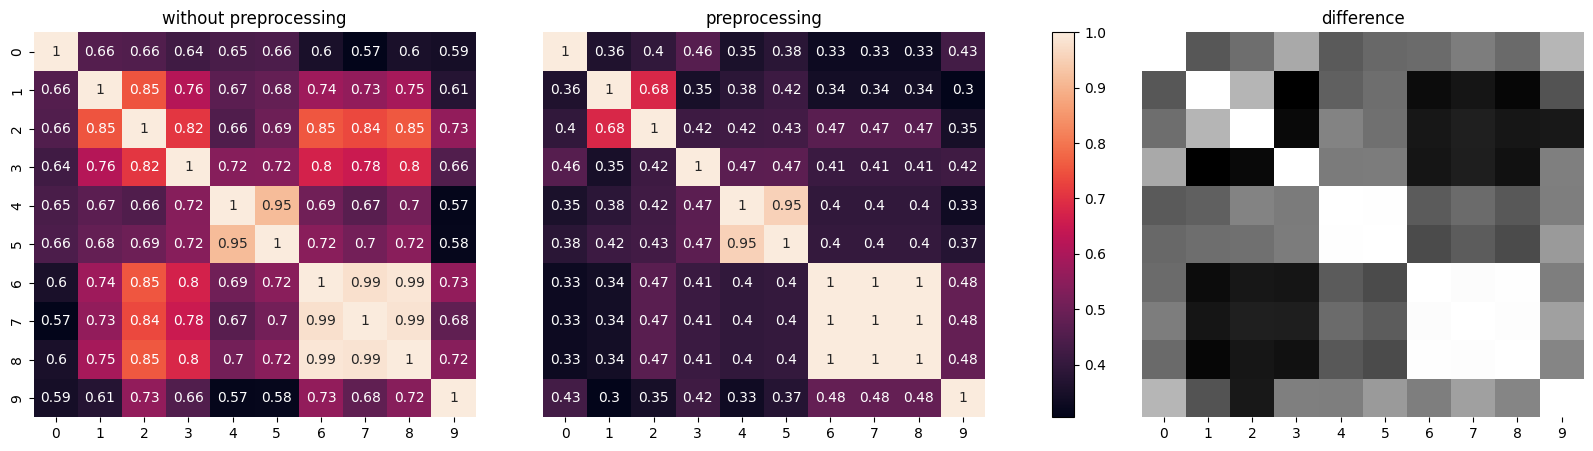

In [149]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# find min, max values from similarity matrix for plotting
vmin = min(scores.min(), scores_pre.min())
vmax = max(scores.max(), scores_pre.max())

# set subplots layout
fig, axs = plt.subplots(ncols=4, width_ratios=[10,10,0.5,10], figsize=(20, 5))

# create subplots
s1 = sns.heatmap(scores, annot=True, cbar=False, ax=axs[0])
s1.set_title('without preprocessing')
s2 = sns.heatmap(scores_pre, annot=True, yticklabels=False, cbar=False, ax=axs[1])
s2.set_title('preprocessing')
s3 = sns.heatmap(abs(scores-scores_pre), yticklabels=False, cbar=False, ax=axs[3], cmap="Greys")
s3.set_title('difference')

# add colorbar
fig.colorbar(axs[1].collections[0], cax=axs[2])

# plot
plt.show()

In [153]:
df_new.to_csv('data/pandas_df2_cleaned.csv') 